# Risk Evaluation using Inferential Statistics

As Risk measurement within the CAPM, the Beta-Factor reflects the sensitive of a particular security against its market volatility.

Since, we want to measure the development of the general risk and uncertainty level of Germany, bootsrapping allows to use resampled data to make statistical inferences. The other one is permutation which is a statistical method to derive whether or not the null hypothesis can be rejected based on the p-value.

**Statistics fundamentals:**

Before we get into the single steps of the statistical analysis of Beta-factors over time, I want to ensure some basic understanding of the applied methods and test statistics in question:

- The **null hypothesis** states that there is no relationship between the two variables being studied (one variable does not affect the other). It states the results are due to chance and are not significant in terms of supporting the idea being investigated.

- The **alternative hypothesis** states that the independent variable did affect the dependent variable, and the results are significant in terms of supporting the theory being investigated (i.e. not due to chance)

- A **p-value**, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true). The level of **statistical significance** is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- **Hypothesis testing:**
testing a hypothesis is an assessment of how reasonable the observed data are assuming the hypothesis is true.

- **Test statistic:**
A test statistic is a single number that can be computed from observed data and also from data you simulate under the null hypothesis. It serves as a basis of comparison between what the hypothesis predicts and what we actually observed. Importantly, you should choose your test statistic to be something that is pertinent to the question you are trying to answer with your hypothesis test, in this case, are the two states different?

- **Standard Deviation**
Standard deviation is a descriptive statistic, which means it helps you to describe or summarize your dataset. It measures how much “spread” or variability there is within your dataset by how far each value within your dataset lies from the mean.

- **Standard Error (Variance)**
Standard error (or standard error of the mean) is an inferential statistic that tells you, in simple terms, how accurately your sample data represents the whole population. Different samples of the same population will give you different results, so it’s important to understand how applicable your findings are. So, when you take the mean results from your sample data and compare it with the overall population mean on a distribution, the standard error tells you what the variance is between the two means. In the case of high standard error, your sample data does not accurately represent the population data; the sample means are widely spread around the population mean.

## Exploratory Data Analysis (EDA)

### Data Preprocessing

In [ ]:
# Load packages ################################################################
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import data ##################################################################
import pandas as pd
dax_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/05_Risk_and_Uncertainty_Quantification/DAX_Screening_2020_0705.csv", sep = ";", decimal=",", error_bad_lines = False)

dax_df.head()


,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


In [ ]:
# Compute missing data as percentage ###########################################
for column in dax_df.columns:
  percentage = dax_df[column].isnull().mean()
  print(f"{column}: {round(percentage*100, 2)}%")

Unternehmen: 0.0%
Sektor: 0.0%
Industrie: 0.0%
Jahr: 0.0%
WACC_cMR: 0.0%
WACC_15yMR: 0.0%
WACC_10yMR: 0.0%
WACC_GB_nSt: 49.61%
WACC_GB_vSt: 73.14%
Eigenkapitalquote_MKT: 0.0%
 Fremdkapitalquote_MKT : 0.0%
CAPM_cMR: 0.0%
CAPM_15yMR: 0.0%
CAPM_10yMR: 0.0%
Beta: 0.0%
risikoloser Zins: 0.0%
Spalte12: 100.0%
Spalte5: 100.0%
Spalte6: 100.0%
Spalte7: 100.0%
Spalte8: 100.0%
Spalte3: 100.0%
Spalte4: 100.0%
Spalte2: 100.0%
Spalte1: 100.0%
Jahr2: 6.86%
WACC_calc_constDAI: 6.86%
WACC_calc_15YDAI: 6.86%
WACC_calc_10YDAI: 6.86%
WACC_calc_constMRP: 6.86%
WACC_GB_nSt.: 53.73%
WACC_GB_vSt2: 74.51%
Bilanzsumme_BW: 6.86%
Eigenkapital_BW: 6.86%
Fremdkapital_BW: 6.86%
EK-Quote_BW: 6.86%
FK-Quote_BW: 6.86%
Gesamtkapital_MKT: 6.86%
Marktkapitalisierung: 8.63%
FK-Kosten_bereinigt: 6.86%
EK-Quote_MKT: 6.86%
FK-Quote_MKT: 6.86%
Aktienanzahl: 8.63%
Aktienkurs: 8.63%
FK-Kosten_unbereinigt: 6.86%
Zinsaufwand: 6.86%
FK_zinstragend: 6.86%
EK-Kosten_MRP_konstant: 6.86%
EK-Kosten_10J_DAI: 6.86%
Beta2: 6.86%
Steuersaet

In [ ]:
# Subset des Data-frame ########################################################
betas = dax_df[["Unternehmen", "Sektor", "Industrie", "Jahr", "Beta"]]
betas.head()


,Unternehmen,Sektor,Industrie,Jahr,Beta
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.50
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.51
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.58
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.03
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.49


**Filter Betas < 0.1**

In [ ]:
# Filter for Betas < 0.1 -> not a realistic number #############################
betas_kl_null = betas[betas["Beta"] < 0.1
                      ]

print(betas_kl_null)

               Unternehmen              Sektor  ...  Jahr  Beta
3                Adidas AG   Consumer Cyclical  ...  2007  0.03
20              Allianz SE  Financial Services  ...  2007  0.09
71           Beiersdorf AG  Consumer Defensive  ...  2007  0.03
187       Deutsche Post AG         Industrials  ...  2007  0.04
323  Deutsche Lufthansa AG         Industrials  ...  2007 -0.12
405                 RWE AG           Utilities  ...  2008 -0.13
422                 SAP SE         Technology   ...  2008  0.03

[7 rows x 5 columns]


**Preprocessing of the data**

In [ ]:
# Finale Datenmanipulation vor Visualisierung ##################################
# Subset Dataframes für die Jahre 2004, 2008, 2012, 2016, 2020
betas_2004_df = betas.loc[betas["Jahr"] == 2004, ["Beta"]]
betas_2008_df = betas.loc[betas["Jahr"] == 2008, ["Beta"]]
betas_2012_df = betas.loc[betas["Jahr"] == 2012, ["Beta"]]
betas_2016_df = betas.loc[betas["Jahr"] == 2016, ["Beta"]]
betas_2020_df = betas.loc[betas["Jahr"] == 2020, ["Beta"]]

# Transformieren der df in np.array-Format
betas_2004 = betas_2004_df["Beta"].to_numpy()
betas_2008 = betas_2008_df["Beta"].to_numpy()
betas_2012 = betas_2012_df["Beta"].to_numpy()
betas_2016 = betas_2016_df["Beta"].to_numpy()
betas_2020 = betas_2020_df["Beta"].to_numpy()

**Sort and verify computed arrays for correct length**

In [ ]:
print(np.sort(betas_2004))

length = len(betas_2004)
print(length)

[0.21 0.23 0.38 0.46 0.5  0.52 0.52 0.53 0.54 0.55 0.56 0.59 0.62 0.8
 0.82 0.82 0.88 0.9  0.94 0.95 0.99 1.07 1.1  1.13 1.14 1.14 1.39 1.42
 1.43 1.53]
30


**Plot DAX30-Betas using Beeswarm-Plots**

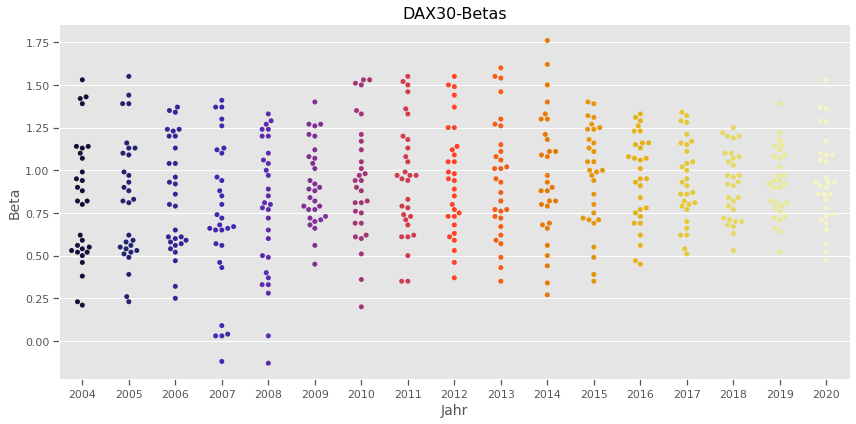

In [ ]:
# Setup figure layout
sns.set_context("notebook")
sns.set_palette("CMRmap_r")

plt.style.use("ggplot")

plt.figure(figsize=(12, 6))

# Plot data as swarmplot
swarm = sns.swarmplot(data = dax_df, y = "Beta", x = "Jahr", palette="CMRmap", size = 5, dodge = True)
plt.xlabel("Jahr", size = 14)
plt.ylabel("Beta", size = 14)
plt.title("DAX30-Betas", fontsize = 16)

# Optimize for display
plt.tight_layout()

plt.show()

### Distributions and Test-statistics


- The CDF is the function that maps from a value to its percentile rank. E.g. the percentile rank is the fraction of people who scored lower than you (or the same). So if you are “in the 90th percentile,” you did as well as or better than 90% of the people who took the exam.
- The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution **less than or equal to x**.
- The CDF of a sample is a step function.
- Percentile ranks are useful for comparing measurements across different groups.

_____________________________
**Advantages:**
- The empirical cumulative distribution function (ECDFs) avoids the binning problems of PMFs.
- It takes some time to get used to CDFs, but they show more information, more clearly, than PMFs.

_____________________
**Glossary:**
- ***Percentile rank***: The percentage of values in a distribution that are less than or equal to a given value.
- ***Percentile***: The value associated with a given percentile rank
- ***Replacement***: A property of a sampling process. “With replacement” means that the same value can be chosen more than once; “without replacement” means that once a value is chosen, it is removed from the population.


____________________

**Calculation of Percentile-based Summary Statistics**

- **50th Percentile**: is the value that divides the distribution in half, also known as the median.
- **Interquartile Range (IQR)**: is a measure of the spread of a distribution. It is the difference between the 75th and 25th percentiles
- **Quintile**: Split distribution at 20th, 40th, 60th and 80th percentiles

**Computation of Test-Statistiken**

In [ ]:
# Computation of the Mean ######################################################
mean_2004 = np.mean(betas_2004_df["Beta"])
mean_2008 = np.mean(betas_2008_df["Beta"])
mean_2012 = np.mean(betas_2012_df["Beta"])
mean_2016 = np.mean(betas_2016_df["Beta"])
mean_2020 = np.mean(betas_2020_df["Beta"])

## Computation of the Mean #####################################################
median_2004 = np.median(betas_2004_df["Beta"])
median_2008 = np.median(betas_2008_df["Beta"])
median_2012 = np.median(betas_2012_df["Beta"])
median_2016 = np.median(betas_2016_df["Beta"])
median_2020 = np.median(betas_2020_df["Beta"])

# Computation of the 95%-Confidence Interval ###################################
ci_2004 = np.percentile(betas_2004_df["Beta"], [2.5, 97.5])
ci_2008 = np.percentile(betas_2008_df["Beta"], [2.5, 97.5])
ci_2012 = np.percentile(betas_2012_df["Beta"], [2.5, 97.5])
ci_2016 = np.percentile(betas_2016_df["Beta"], [2.5, 97.5])
ci_2020 = np.percentile(betas_2020_df["Beta"], [2.5, 97.5])

# Print Summary Statistics #####################################################
print("Means:", [round(mean_2004, 3), round(mean_2008, 3), round(mean_2012, 4), round(mean_2016, 3), round(mean_2020, 4)])
print("Medians:", [round(median_2004, 3), round(median_2008, 3), round(median_2012, 4), round(median_2016, 3), round(median_2020, 4)])
print("95%-CI:", [ci_2004, ci_2008, ci_2012, ci_2016, ci_2020])

Means: [0.822, 0.78, 0.9517, 0.954, 0.9407]
Medians: [0.82, 0.805, 0.945, 0.98, 0.92]
95%-CI: [array([0.2245, 1.4575]), array([-0.014,  1.301]), array([0.43525, 1.51375]), array([0.4645, 1.3155]), array([0.50625, 1.414  ])]


**Visualizing Test-Statistics**

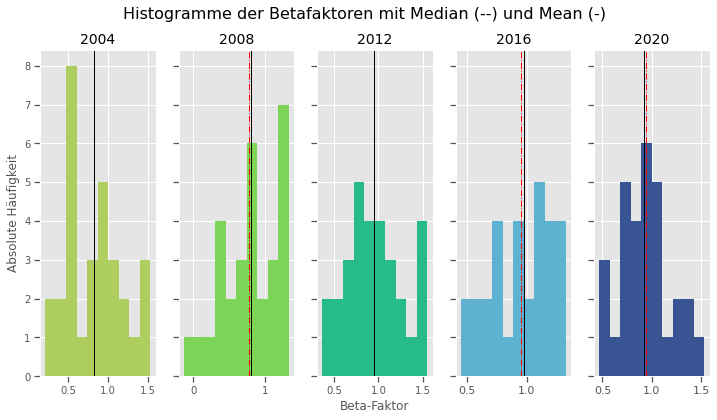

In [ ]:
# Create Figure Grid ###########################################################
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (12,6), sharey = True)
plt.style.use("ggplot")

# Plot histograms ##############################################################
ax[0].hist(betas_2004_df["Beta"], bins = 10, color = "#AFCE60")
ax[1].hist(betas_2008_df["Beta"], bins = 10, color = "#7CD559")
ax[2].hist(betas_2012_df["Beta"], bins = 10, color = "#27BB8A")
ax[3].hist(betas_2016_df["Beta"], bins = 10, color = "#5FB2CF")
ax[4].hist(betas_2020_df["Beta"], bins = 10, color = "#385492")

# Plot Summary Statistics ######################################################
# Plot Means
ax[0].axvline(x = mean_2004, color = "red", linestyle = "-.", linewidth = 1)
ax[1].axvline(x = mean_2008, color = "red", linestyle = "-.", linewidth = 1)
ax[2].axvline(x = mean_2012, color = "red", linestyle = "-.", linewidth = 1)
ax[3].axvline(x = mean_2016, color = "red", linestyle = "-.", linewidth = 1)
ax[4].axvline(x = mean_2020, color = "red", linestyle = "-.", linewidth = 1)
# Plot Medians
ax[0].axvline(x = median_2004, color = "black", linestyle = "-", linewidth = 1)
ax[1].axvline(x = median_2008, color = "black", linestyle = "-", linewidth = 1)
ax[2].axvline(x = median_2012, color = "black", linestyle = "-", linewidth = 1)
ax[3].axvline(x = median_2016, color = "black", linestyle = "-", linewidth = 1)
ax[4].axvline(x = median_2020, color = "black", linestyle = "-", linewidth = 1)

# Customize Figure Layout ######################################################
# Annotate Summary Statistics

# Reduce tick label size
ax[0].tick_params(axis = "both", labelsize = 10)
ax[1].tick_params(axis = "both", labelsize = 10)
ax[2].tick_params(axis = "both", labelsize = 10)

# Add Titles
ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

ax[2].set_xlabel("Beta-Faktor")
ax[0].set_ylabel("Absolute Häufigkeit")

plt.suptitle("Histogramme der Betafaktoren mit Median (--) und Mean (-)", fontsize = 16)

plt.show();

### Probability Mass Function (PMF)

- Another way to represent a distribution is a probability mass function (PMF), which maps from **each value to its probability**. 
- A **probability is a frequency expressed as a fraction** of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called normalization.
- Probability **mass and density** functions are used to describe **discrete and continuous** probability distributions, respectively
- The biggest difference is that a Hist maps from values to integer
counters; a Pmf maps from values to floating-point probabilities.
- Thus, **the Probability Mass Function (PMF) provides the probability distribution for discrete variables.**

_____________________________
**Advantages:**
- By plotting the PMF instead of the histogram, we can compare the two distributions without being misled by the difference in sample size.
- PMFs are useful while you are exploring data and trying to identify
patterns and relationships.

______________________________
**Limits of PMFs:**
- PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.
- Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.

_____________________
**Glossary:**
- ***Probability mass function (PMF):*** a representation of a distribution as a function that maps from values to probabilities.
- ***Probability:*** A frequency expressed as a fraction of the sample size.
- ***Normalization:*** The process of dividing a frequency by a sample size to get a probability.

____________________

**Definition of the PMF-Function (Wahrscheinlichkeitsfunktion)**

PMFs show relative frequency of discrete values

In [ ]:
# Definition of the Probability Mass Function (PMF) ############################
def pmf(series):
  series = series.sort_index()
  series = series.value_counts(normalize = True)
  series.index = series.index.astype(str)
  pmf_df = pd.DataFrame(series)
  pmf_df.index.name = "Interval"

  return pmf_df

**Visualizing Betas based on Binning (Intervals)**

In [ ]:
# Data manipulation for PMF-computation: #######################################
import pandas as pd
import numpy as np

bins = np.linspace(0, 2, num = 11)

# Beta-Faktoren sind kontinuierliche Variablen und werden mithilfe von pd.cut() in kategorische Variablen umgewandelt #######
beta_2004 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2004, "Beta"], bins = bins, right = False)
beta_2008 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2008, "Beta"], bins = bins, right = False)
beta_2012 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2012, "Beta"], bins = bins, right = False)
beta_2016 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2016, "Beta"], bins = bins, right = False)
beta_2020 = pd.cut(dax_df.loc[dax_df["Jahr"]== 2020, "Beta"], bins = bins, right = False)

In [ ]:
# Anwenden der PMF-Funktion (oben) zur Erstellung normalisierter Frequenzen in jedem Bin ####################################
pmf_2004 = pmf(beta_2004)
pmf_2008 = pmf(beta_2008)
pmf_2012 = pmf(beta_2012)
pmf_2016 = pmf(beta_2016)
pmf_2020 = pmf(beta_2020)

In [ ]:
pmf_2004


,Beta
Interval,
"[0.4, 0.6)",0.300000
"[0.8, 1.0)",0.266667
"[1.0, 1.2)",0.166667
"[1.4, 1.6)",0.100000
"[0.2, 0.4)",0.100000
"[1.2, 1.4)",0.033333
"[0.6, 0.8)",0.033333
"[1.8, 2.0)",0.000000
"[1.6, 1.8)",0.000000


**Standardising the order of intervals (uniformed x-axes across plots)**

Ziel ist es bei der Visualisierung durch einheitliche x-Achse, die Vergleichbarkeit der Beta-Faktoren über die Jahre hinweg zu erleichtern

In [ ]:
# Define index order ###########################################################
index = ["[0.0, 0.2)", "[0.2, 0.4)", "[0.4, 0.6)", "[0.6, 0.8)", "[0.8, 1.0)", 
         "[1.0, 1.2)", "[1.2, 1.4)", "[1.4, 1.6)", "[1.6, 1.8)", "[1.8, 2.0)"]

# Erstellen einheitlicher PMFs #################################################
pmf_2004 = pmf_2004.reindex(index = index)
pmf_2008 = pmf_2008.reindex(index = index)
pmf_2012 = pmf_2012.reindex(index = index)
pmf_2016 = pmf_2016.reindex(index = index)
pmf_2020 = pmf_2020.reindex(index = index)

# Using a sample pmf to get a better picture ###################################
pmf_2004

,Beta
Interval,
"[0.0, 0.2)",0.000000
"[0.2, 0.4)",0.100000
"[0.4, 0.6)",0.300000
"[0.6, 0.8)",0.033333
"[0.8, 1.0)",0.266667
"[1.0, 1.2)",0.166667
"[1.2, 1.4)",0.033333
"[1.4, 1.6)",0.100000
"[1.6, 1.8)",0.000000


**Visualising the PMF**

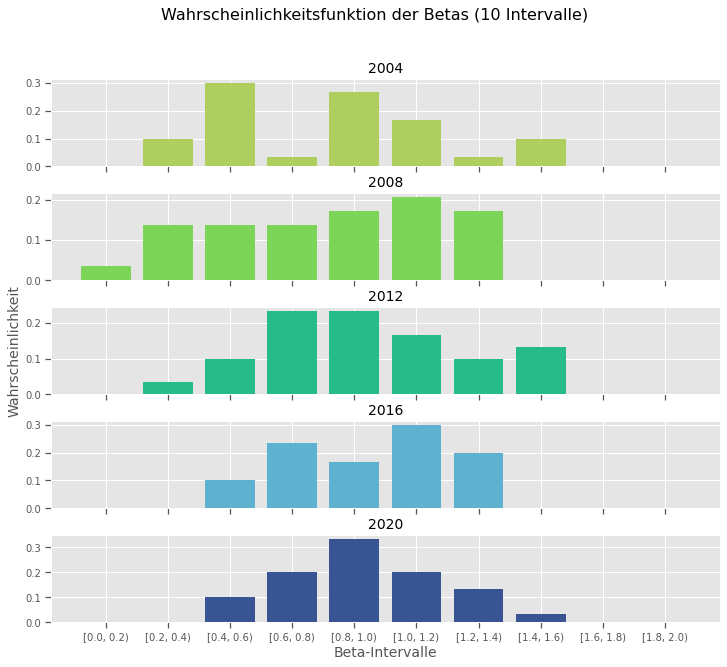

In [ ]:
# Plot PMFs side-to-side #######################################################
import seaborn as sns

# Create figure grid that allows plotting 2 charts below each other ############
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (12,10), sharex = True)
# Define horizontal space between PMF-plots
plt.subplots_adjust(hspace = 0.3)
# Use "fivethiryeight" style
plt.style.use("ggplot")

# Plot PMF-charts for beta_2004 and beta_2020 ##################################
ax[0].bar(pmf_2004.index, pmf_2004["Beta"], color = "#AFCE60")
ax[1].bar(pmf_2008.index, pmf_2008["Beta"], color = "#7CD559")
ax[2].bar(pmf_2012.index, pmf_2012["Beta"], color = "#27BB8A")
ax[3].bar(pmf_2016.index, pmf_2016["Beta"], color = "#5FB2CF")
ax[4].bar(pmf_2020.index, pmf_2020["Beta"], color = "#385492")

# Label Axes, Ticks, etc #######################################################
ax[2].set_ylabel("Wahrscheinlichkeit",fontsize = 14)
ax[4].set_xlabel("Beta-Intervalle", fontsize = 14)

# Reduce tick label size
ax[0].tick_params(axis = "both", labelsize = 10)
ax[1].tick_params(axis = "both", labelsize = 10)
ax[2].tick_params(axis = "both", labelsize = 10)
ax[3].tick_params(axis = "both", labelsize = 10)
ax[4].tick_params(axis = "both", labelsize = 10)

# Define subtitles
ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

# Create title
plt.suptitle("Wahrscheinlichkeitsfunktion der Betas (10 Intervalle)", fontsize = 16)

plt.show()

### Empirical Cumulative Distribution Function (ECDF)


- The CDF is the function that maps from a value to its percentile rank. E.g. the percentile rank is the fraction of people who scored lower than you (or the same). So if you are “in the 90th percentile,” you did as well as or better than 90% of the people who took the exam.
- The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution **less than or equal to x**.
- The CDF of a sample is a step function.
- Percentile ranks are useful for comparing measurements across different groups.

_____________________________
**Advantages:**
- The empirical cumulative distribution function (ECDFs) avoids the binning problems of PMFs.
- It takes some time to get used to CDFs, but they show more information, more clearly, than PMFs.

_____________________
**Glossary:**
- ***Percentile rank***: The percentage of values in a distribution that are less than or equal to a given value.
- ***Percentile***: The value associated with a given percentile rank
- ***Replacement***: A property of a sampling process. “With replacement” means that the same value can be chosen more than once; “without replacement” means that once a value is chosen, it is removed from the population.


____________________

**Calculation of Percentile-based Summary Statistics**

- **50th Percentile**: is the value that divides the distribution in half, also known as the median.
- **Interquartile Range (IQR)**: is a measure of the spread of a distribution. It is the difference between the 75th and 25th percentiles
- **Quintile**: Split distribution at 20th, 40th, 60th and 80th percentiles

**Empirical Cumulated Distribution Function (ECDF)**

This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

**ECDFs vs. Histograms**
- Histograms are less informative 
- Histograms have a "Binning Bias" which is due to the way you bin your data can alter the way you understand it
- Among the distribution curve, the ECDF plots all statistics that you usually get see in box plots
- In ECDFs, outliers can also be spotted, because the line does not change
- Peaks in the Histogram are displayed as steep slopes in the ECDF curves


In [ ]:
# Define ecdf-function #########################################################
def ecdf(data):
    """
    Zweck:
    -----------
    Berechung der ECDF auf Basis eines eindimensionalen Arrays
    
    Argument:
    -----------
    data = Datensatz zur Erstellung der 
    Empirischen Verteilungsfunktion
    
    Return:
    -----------
    x = sortierte Werte
    y = Gleichmäßige y-Abschnitte von 0 bis 1
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
# Generating ECDF ########################################################
x_04, y_04 = ecdf(betas_2004)
x_08, y_08 = ecdf(betas_2008)
x_12, y_12 = ecdf(betas_2012)
x_16, y_16 = ecdf(betas_2016)
x_20, y_20 = ecdf(betas_2020)

print("x_04:", x_04, "y_04:", y_04)
print("x_08:", x_08, "y_08:", y_08)
print("x_12:", x_12, "y_12:", y_12)
print("x_16:", x_16, "y_16:", y_16)
print("x_20:", x_20, "y_20:", y_20)

x_04: [0.21 0.23 0.38 0.46 0.5  0.52 0.52 0.53 0.54 0.55 0.56 0.59 0.62 0.8
 0.82 0.82 0.88 0.9  0.94 0.95 0.99 1.07 1.1  1.13 1.14 1.14 1.39 1.42
 1.43 1.53] y_04: [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]
x_08: [-0.13  0.03  0.28  0.33  0.33  0.37  0.4   0.49  0.5   0.6   0.65  0.72
  0.77  0.78  0.8   0.81  0.85  0.89  0.97  1.    1.04  1.06  1.1   1.2
  1.2   1.24  1.24  1.27  1.29  1.33] y_08: [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]
x_12: [0.37 0.46 0.53 0.

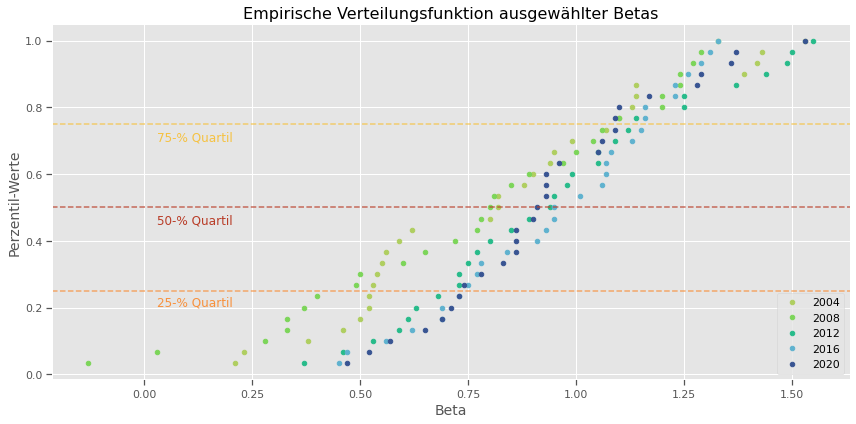

In [ ]:
# Visualising ECDFs ############################################################

# Define style in use
plt.style.use("ggplot")
plt.figure(figsize= (12,6))

# Plot ECDFs
plt.plot(x_04, y_04, marker = ".", markersize = 9, linestyle = "none", color = "#AFCE60")
plt.plot(x_08, y_08, marker = ".", markersize = 9, linestyle = "none", color = "#7CD559")
plt.plot(x_12, y_12, marker = ".", markersize = 9, linestyle = "none", color = "#27BB8A")
plt.plot(x_16, y_16, marker = ".", markersize = 9, linestyle = "none", color = "#5FB2CF")
plt.plot(x_20, y_20, marker = ".", markersize = 9, linestyle = "none", color = "#385492")

# Add annotations
plt.legend(("2004", "2008", "2012", "2016", "2020"), loc = "lower right", frameon = True)
plt.axhline(y = 0.75 , color = "#F6C242", linestyle = "--", linewidth = 1.5, alpha = 0.75)
plt.axhline(y = 0.5 , color = "#B93D28", linestyle = "--", linewidth = 1.5, alpha = 0.75)
plt.axhline(y = 0.25 , color = "#F8913D", linestyle = "--", linewidth = 1.5, alpha = 0.75)

plt.annotate("75-% Quartil",xy = (0.03,0.70), color = "#F6C242", fontsize = 12)
plt.annotate("50-% Quartil",xy = (0.03,0.45), color = "#B93D28", fontsize = 12)
plt.annotate("25-% Quartil",xy = (0.03,0.205), color = "#F8913D", fontsize = 12)

plt.title("Empirische Verteilungsfunktion ausgewählter Betas", fontsize = 16)
plt.xlabel("Beta", fontsize = 14)
plt.ylabel("Perzentil-Werte", fontsize = 14)

# Enhanced Layout
plt.tight_layout()

plt.show()


### Probability Density Functions (PDF)

**Description**:
- The derivative of a CDF is called a probability density function, or PDF.
- Evaluating a PDF for a particular value of x is usually not useful. The result is not a probability; it is a probability density.
- In physics, density is mass per unit of volume; in order to get a mass, you have to multiply by volume or, if the density is not constant, you have to integrate over volume. Similarly, probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x.
- ***Kernel density estimation (KDE)*** is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.
_________________________________

**Purpose / Application**:
- ***Visualization***:During the exploration phase of a project, CDFs are usually the best visualization of a distribution. After you look at a CDF, you can decide whether an estimated PDF is an appropriate model of the distribution.
- ***Interpolation***: An estimated PDF is a way to get from a sample to a model of the population.
- ***Simulation***: If the sample size is small, it might be appropriate to smooth the sample distribution using KDE, which
allows the simulation to explore more possible outcomes, rather than replicating the observed data.

__________________________________
**Skewness**:
- Skewness is a property that describes the shape of a distribution. - If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is “***right skewed***” and if the values extend left, it is “***left skewed***.”
- Extreme values have more effect on the mean than the median, so in a distribution that ***skews left***, the mean is less than the median. In a distribution that ***skews right***, the mean is greater.

__________________________________
**Glossary**:
- ***Probability density function (PDF)***: The derivative of a continuous CDF, a function that maps a value to its probability
density.
- ***Probability density***: A quantity that can be integrated over a range of values to yield a probability.
- ***Kernel density estimation (KDE)***: An algorithm that estimates a PDF based on a sample.
- ***Skewness***: A measure of how asymmetric a distribution is.


**Visualising Probability Density Funktion (PDF)**

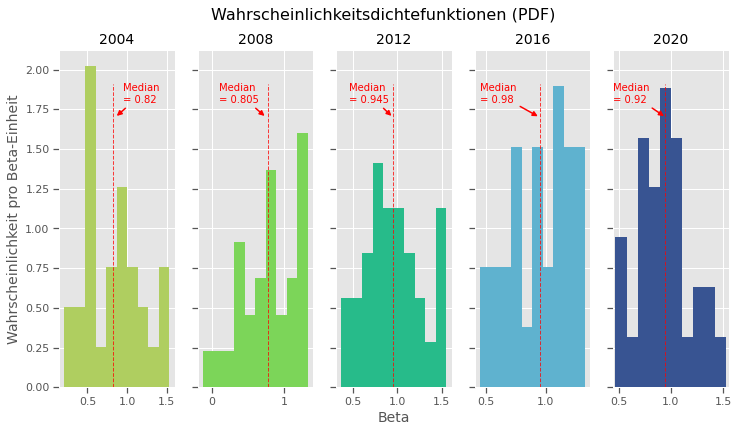

In [ ]:
# Plot Beta means ##############################################################
fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 6))

# Plot ECDF  ###################################################################
ax[0].hist(betas_2004, bins = 10, color = "#AFCE60", density = True)
ax[1].hist(betas_2008, bins = 10, color = "#7CD559", density = True)
ax[2].hist(betas_2012, bins = 10, color = "#27BB8A", density = True)
ax[3].hist(betas_2016, bins = 10, color = "#5FB2CF", density = True)
ax[4].hist(betas_2020, bins = 10, color = "#385492", density = True)

ax[0].axvline(x = np.mean(betas_2004), color = "red", linestyle = "--", linewidth = 1, alpha = 0.75, ymax = 0.9)
ax[1].axvline(x = np.mean(betas_2008), color = "red", linestyle = "--", linewidth = 1, alpha = 0.75, ymax = 0.9)
ax[2].axvline(x = np.mean(betas_2012), color = "red", linestyle = "--", linewidth = 1, alpha = 0.75, ymax = 0.9)
ax[3].axvline(x = np.mean(betas_2016), color = "red", linestyle = "--", linewidth = 1, alpha = 0.75, ymax = 0.9)
ax[4].axvline(x = np.mean(betas_2020), color = "red", linestyle = "--", linewidth = 1, alpha = 0.75, ymax = 0.9)

# Define Margins and Axes-labels ###############################################
plt.margins(0.02)

ax[0].set_ylabel("Wahrscheinlichkeit pro Beta-Einheit", fontsize = 14)
ax[2].set_xlabel("Beta", fontsize = 14)

ax[0].set_title("2004", fontsize = 14)
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

# Annotations using Arrows #####################################################
ax[0].annotate(f"Median\n= {round(median_2004, 3)}",xy = (0.85, 1.7), xytext = (0.95, 1.79), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1.5, "color":"red"}) # Mit Pfeil
ax[1].annotate(f"Median\n= {round(median_2008, 3)}",xy = (0.75, 1.7), xytext = (0.1, 1.79), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1.5, "color":"red"}) # Mit Pfeil
ax[2].annotate(f"Median\n= {round(median_2012, 3)}",xy = (0.95, 1.7), xytext = (0.45, 1.79), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1.5, "color":"red"}) # Mit Pfeil
ax[3].annotate(f"Median\n= {round(median_2016, 3)}",xy = (0.95, 1.7), xytext = (0.45, 1.79), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1.5, "color":"red"}) # Mit Pfeil
ax[4].annotate(f"Median\n= {round(median_2020, 3)}",xy = (0.95, 1.7), xytext = (0.45, 1.79), color = 'red', fontsize = 10, 
               arrowprops={"arrowstyle":"-|>", "lw": 1.5, "color":"red"}) # Mit Pfeil

fig.suptitle("Wahrscheinlichkeitsdichtefunktionen (PDF)", fontsize = 16)

# Darstellung der Plots ########################################################
plt.subplots_adjust(bottom = 0.1)

plt.show()


**Visualising Kernel Density Estimation (KDE)**

In [ ]:
dax_df.head()


,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


In [ ]:
##### Data preprocessing #######################################################

# Subset "Jahr" und "Beta" columns
dax_year_beta = dax_df[["Jahr", "Beta"]]

# Reducing the dataframe to the years 2004, 2008, 2012, 2016, 2020 #########
betas = dax_year_beta[(dax_year_beta["Jahr"] == 2004) | 
                             (dax_year_beta["Jahr"] == 2008) | 
                             (dax_year_beta["Jahr"] == 2012) |
                             (dax_year_beta["Jahr"] == 2016) |
                             (dax_year_beta["Jahr"] == 2020)]

# Aufrufen von .shape zur Überprüfung der Data-frame-Struktur
betas.shape

(150, 2)

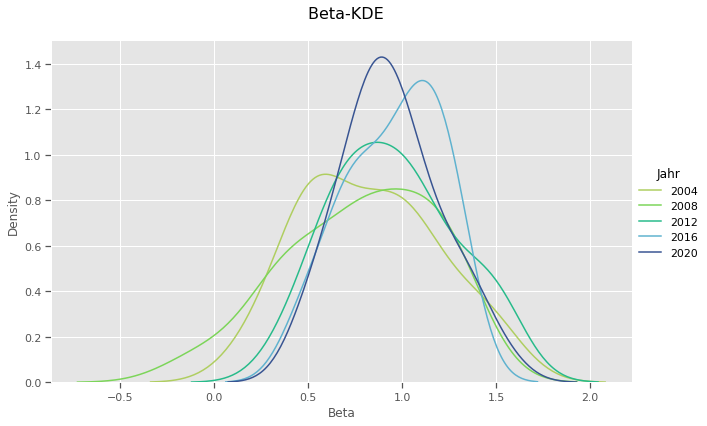

In [ ]:
##### Daten-Plotting mit KDE-Plot ##############################################

import seaborn as sns

g = sns.FacetGrid(betas, hue = "Jahr", height = 6, sharey = True, aspect = 1.5, 
                  hue_kws = {"color": ["#AFCE60", "#7CD559", "#27BB8A", "#5FB2CF", "#385492"]})
g.map(sns.kdeplot, "Beta")
g.fig.subplots_adjust(top = 0.85) # adjust the Figure in rp
g.fig.suptitle('Beta-KDE ', fontsize = 16)

#plt.tight_layout() 
plt.subplots_adjust(top = 0.9)
g.add_legend();

g.figure.savefig("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(3)_Risikountersuchung_mit_Inferenzstatistik/a6_KDE_der_Betas.pdf")